Accuracy on test set: 0.8045

Classification Report:
               precision    recall  f1-score   support

           0     0.8099    0.8909    0.8485       110
           1     0.7931    0.6667    0.7244        69

    accuracy                         0.8045       179
   macro avg     0.8015    0.7788    0.7864       179
weighted avg     0.8034    0.8045    0.8007       179

ROC AUC: 0.8439
Confusion Matrix:
 [[98 12]
 [23 46]]


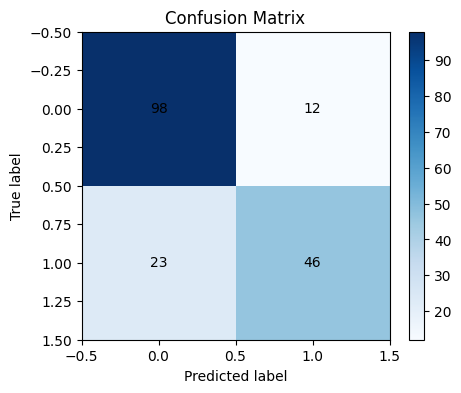

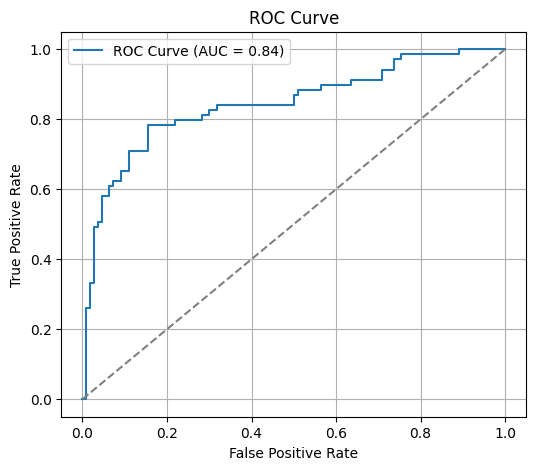

 Titanic Survival Prediction Results 
Total passengers in test set: 179
Number of survivors in test set (actual): 69
Number of survivors predicted by model: 58

Model Accuracy: 0.80
Precision (Survived=1): 0.79
Recall (Survived=1): 0.67
F1-score (Survived=1): 0.72

Confusion Matrix:
[[98 12]
 [23 46]]
Summary: Out of 179 test passengers, 69 actually survived. The model predicted 58 survivors. Accuracy = 80.45%.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

df = pd.read_csv("train.csv")

features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']
target = 'Survived'
df = df[features + [target]].copy()

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

X = df[features]
y = df[target]

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
categorical_features = ['Sex', 'Embarked']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(drop='first', sparse_output=False))]
)

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy on test set: {:.4f}".format(accuracy))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
print("ROC AUC: {:.4f}".format(roc_auc))
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest', cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

print(" Titanic Survival Prediction Results ")
print(f"Total passengers in test set: {len(y_test)}")
print(f"Number of survivors in test set (actual): {sum(y_test)}")
print(f"Number of survivors predicted by model: {sum(y_pred)}\n")

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision (Survived=1): {report['1']['precision']:.2f}")
print(f"Recall (Survived=1): {report['1']['recall']:.2f}")
print(f"F1-score (Survived=1): {report['1']['f1-score']:.2f}\n")

print("Confusion Matrix:")
print(cm)

print(f"Summary: Out of {len(y_test)} test passengers, {sum(y_test)} actually survived. "
      f"The model predicted {sum(y_pred)} survivors. Accuracy = {accuracy:.2%}.")
